<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/Function_Worked_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Download Data**

In [21]:
data = yf.download(["AAPL", "MSFT"], start="2000-01-01", end = "2024-09-10")

[*********************100%***********************]  2 of 2 completed


### **Check Object Type**

In [22]:
type(data)

pandas.core.frame.DataFrame

### **Visualize Data**

In [23]:
data.head()

Price                     Adj Close                Close                High  \
Ticker                         AAPL       MSFT      AAPL      MSFT      AAPL   
Date                                                                           
2000-01-03 00:00:00+00:00  0.844004  35.935867  0.999442  58.28125  1.004464   
2000-01-04 00:00:00+00:00  0.772846  34.721951  0.915179  56.31250  0.987723   
2000-01-05 00:00:00+00:00  0.784155  35.088039  0.928571  56.90625  0.987165   
2000-01-06 00:00:00+00:00  0.716296  33.912651  0.848214  55.00000  0.955357   
2000-01-07 00:00:00+00:00  0.750226  34.355843  0.888393  55.71875  0.901786   

Price                                    Low                Open            \
Ticker                        MSFT      AAPL      MSFT      AAPL      MSFT   
Date                                                                         
2000-01-03 00:00:00+00:00  59.3125  0.907924  56.00000  0.936384  58.68750   
2000-01-04 00:00:00+00:00  58.5625  0.903460  56.12500  0.966518  56.78125   
2000-01-05 00:00:00+00:00  58.1875  0.919643  54.68750  0.926339  55.56250   
2000-01-06 00:00:00+00:00  56.9375  0.848214  54.18750  0.947545  56.09375   
2000-01-07 00:00:00+00:00  56.1250  0.852679  53.65625  0.861607  54.31250   

Price                         Volume            
Ticker                          AAPL      MSFT  
Date                                            
2000-01-03 00:00:00+00:00  535796800  53228400  
2000-01-04 00:00:00+00:00  512377600  54119000  
2000-01-05 00:00:00+00:00  778321600  64059600  
2000-01-06 00:00:00+00:00  767972800  54976600  
2000-01-07 00:00:00+00:00  460734400  62013600

### **Define Variables**

In [24]:
apple_close = data[('Adj Close', 'AAPL')]
microsoft_close = data[('Adj Close', 'MSFT')]

### **Plot Variables**

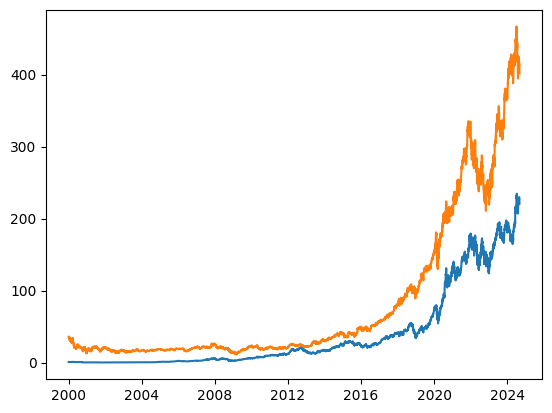

In [25]:
plt.plot(apple_close)
plt.plot(microsoft_close)
plt.show()

### **Scatter Plot**

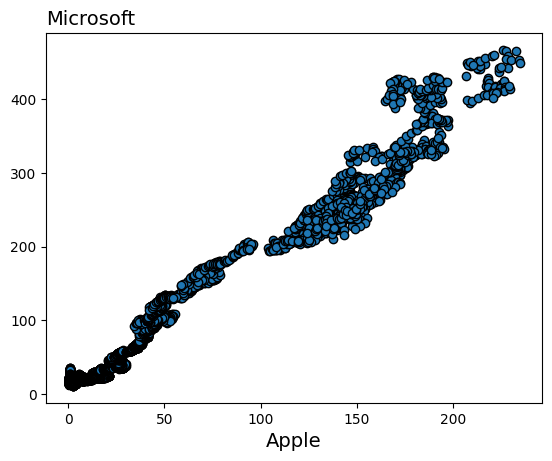

In [32]:
plt.scatter(apple_close, microsoft_close, edgecolors='black')
plt.xlabel("Apple", size=14)
plt.title('Microsoft', loc='left', size=14)
plt.show()

### **Correlation Coefficient**

In [36]:
np.corrcoef(apple_close, microsoft_close)[0,1]

0.9877690290464556

### **Defining a Function**

In [37]:
def stock_price_correlation(stock1_name, stock2_name, start_time, end_time):
  # Download the data
  data = yf.download([stock1_name, stock2_name], start=start_time, end=end_time)
  stock1 = data[('Adj Close', stock1_name)]
  stock2 = data[('Adj Close', stock2_name)]
  return np.corrcoef(stock1, stock2)[0,1]

#### **Apple v.s. Microsoft**

In [39]:
stock_price_correlation('AAPL', 'MSFT', '2000-01-01', '2024-09-10')

[*********************100%***********************]  2 of 2 completed


0.987769028461491

#### **Apple v.s. Berkshire Hathaway**

In [42]:
stock_price_correlation('AAPL', 'BRK-B', '2000-01-01', '2024-09-10')

[*********************100%***********************]  2 of 2 completed


0.9542457905911712

#### **Apple v.s. Duke Energy**

In [43]:
stock_price_correlation('AAPL', 'DUK', '2000-01-01', '2024-09-10')

[*********************100%***********************]  2 of 2 completed


0.9007042038075249

### **Since January 2024**

In [46]:
avm = stock_price_correlation('AAPL', 'MSFT', '2024-01-01', '2024-09-10')
print(f"Apple v.s. Microsoft: {avm:.3f}")
avb = stock_price_correlation('AAPL', 'BRK-B', '2024-01-01', '2024-09-10')
print(f"Apple v.s. Berkshire Hathaway: {avb:.3f}")
avd = stock_price_correlation('AAPL', 'DUK', '2024-01-01', '2024-09-10')
print(f"Apple v.s. Duke Energy: {avd:.3f}")

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


Apple v.s. Microsoft: 0.502
Apple v.s. Berkshire Hathaway: 0.589


[*********************100%***********************]  2 of 2 completed

Apple v.s. Duke Energy: 0.783


#### **Application of For Loops & Dictionaries & Lists**

In [52]:
stocks = ['MSFT', 'BRK-B', 'DUK']
dates = ['2000-01-01', '2004-01-01', '2012-01-01', '2016-01-01', '2020-01-01', '2024-01-01', '2024-03-01', '2024-05-01', '2024-07-01']

results = {}
for stock in stocks:
  results[stock] = []
  for start_date in dates:
    av = stock_price_correlation('AAPL', stock, start_date, '2024-09-01')
    results[stock].append(av)

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%********

#### **Plot**

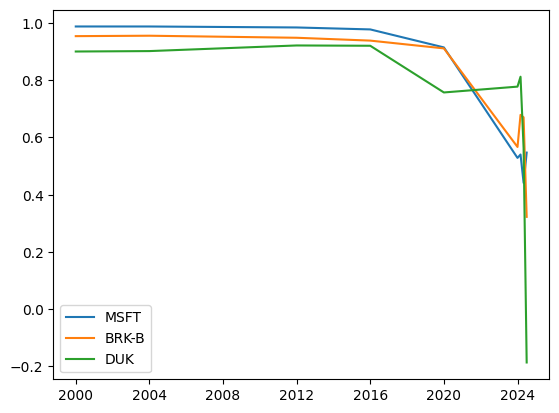

In [53]:
for stock in stocks:
  plt.plot(pd.to_datetime(dates), results[stock], label=stock)
plt.legend()
plt.show()